# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_final = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

# Set variables for city numbers/Set counts
record = 0
recordset = 1

# Display header for the print log
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        
        # Add to city count
        record += 1

        # Print city to log
        print(f"Processing Record {record} of Set {recordset} | {city}")
        
        # Append city's data to lists
        city_final.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])    
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])    
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])    
        country.append(response['sys']['country'])
        date.append(response['sys']['sunrise'])
        
        # Reset the city count at 50 and step Set number
        if record >= 50:
            record = 0
            recordset += 1
            
    except (KeyError, IndexError):
        # Add to city count
        record += 1        
        # Reset the city count at 50 and step Set number
        if record >= 50:
            record = 0
            recordset += 1
        print("City not found. Skipping...")

# Display footer for the print log
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | jijiga
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | isangel
Processing Record 24 of Set 1 | sioux looko

Processing Record 4 of Set 5 | sokolskoye
Processing Record 5 of Set 5 | tifesti
Processing Record 6 of Set 5 | piacabucu
Processing Record 7 of Set 5 | pokhara
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | avera
Processing Record 10 of Set 5 | tornio
Processing Record 11 of Set 5 | sorvag
City not found. Skipping...
Processing Record 13 of Set 5 | el alto
Processing Record 14 of Set 5 | lagoa
Processing Record 15 of Set 5 | luderitz
Processing Record 16 of Set 5 | fuerte olimpo
Processing Record 17 of Set 5 | faya
Processing Record 18 of Set 5 | rodrigues alves
Processing Record 19 of Set 5 | neuquen
Processing Record 20 of Set 5 | singkang
Processing Record 21 of Set 5 | saint-augustin
Processing Record 22 of Set 5 | gourcy
Processing Record 23 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 5 | tungkang
City not found. Skipping...
Processing Record 27 of Set 5 | saleaula
City not found. Skipping...
Processing Record 29 of Set 5 |

Processing Record 8 of Set 9 | santa maria da vitoria
Processing Record 9 of Set 9 | surok
Processing Record 10 of Set 9 | carballo
Processing Record 11 of Set 9 | esmeraldas
Processing Record 12 of Set 9 | marshalltown
Processing Record 13 of Set 9 | shimanovsk
Processing Record 14 of Set 9 | at-bashi
Processing Record 15 of Set 9 | namuac
Processing Record 16 of Set 9 | romanovo
Processing Record 17 of Set 9 | carroll
Processing Record 18 of Set 9 | marand
Processing Record 19 of Set 9 | leh
Processing Record 20 of Set 9 | iracoubo
Processing Record 21 of Set 9 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 9 | ishigaki
Processing Record 24 of Set 9 | sisimiut
Processing Record 25 of Set 9 | benha
City not found. Skipping...
Processing Record 27 of Set 9 | aleysk
Processing Record 28 of Set 9 | pishin
Processing Record 29 of Set 9 | kerema
Processing Record 30 of Set 9 | eyl
Processing Record 31 of Set 9 | rio claro
Processing Record 32 of Set 9 | bambous virieux
P

Processing Record 8 of Set 13 | cap-aux-meules
Processing Record 9 of Set 13 | boa vista
Processing Record 10 of Set 13 | rabak
Processing Record 11 of Set 13 | belyy yar
Processing Record 12 of Set 13 | moose factory
Processing Record 13 of Set 13 | grand gaube
Processing Record 14 of Set 13 | bogande
Processing Record 15 of Set 13 | gravelbourg
Processing Record 16 of Set 13 | quang ngai
Processing Record 17 of Set 13 | severomuysk
Processing Record 18 of Set 13 | totness
Processing Record 19 of Set 13 | campos novos
Processing Record 20 of Set 13 | severodvinsk
Processing Record 21 of Set 13 | mundo nuevo
Processing Record 22 of Set 13 | tanabe
Processing Record 23 of Set 13 | waterloo
Processing Record 24 of Set 13 | shihezi
Processing Record 25 of Set 13 | mayo
Processing Record 26 of Set 13 | ilhabela
Processing Record 27 of Set 13 | dinsor
City not found. Skipping...
Processing Record 29 of Set 13 | goundam
Processing Record 30 of Set 13 | labuhan
Processing Record 31 of Set 13 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert data to DataFrame
weather_df = pd.DataFrame({"City": city_final,
                          "Lat": lat,
                          "Lng": long,
                          "Max Temp": maxtemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

# Format latitude/longitude for two decimal places only, retain as float
weather_df['Lat'] = weather_df['Lat'].map('{:.2f}'.format).astype(float)
weather_df['Lng'] = weather_df['Lng'].map('{:.2f}'.format).astype(float)

# Export to CSV
weather_df.to_csv(output_data_file, index=False, header=True)

# Display the DataFrame
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,61.97,94,13,5.88,ZA,1649653176
1,Ushuaia,-54.80,-68.30,42.46,70,75,3.44,AR,1649589259
2,Necochea,-38.55,-58.74,63.93,94,100,9.26,AR,1649585844
3,Hobart,-42.88,147.33,59.05,56,75,12.66,AU,1649623056
4,Kapaa,22.08,-159.32,79.12,81,75,12.66,US,1649607686


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Describe the DataFrame
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.589346,13.510241,58.350000,71.530120,58.636833,8.435611,1.649621e+09
std,32.712310,88.549676,22.759701,21.690882,37.764296,5.713947,2.723134e+04
min,-54.800000,-179.170000,-10.390000,1.000000,0.000000,0.000000,1.649575e+09
25%,-7.610000,-64.350000,42.660000,61.000000,20.000000,4.210000,1.649591e+09
50%,24.800000,18.420000,63.970000,77.000000,72.000000,7.000000,1.649627e+09
75%,48.350000,83.980000,77.200000,87.000000,98.000000,11.070000,1.649645e+09
max,78.220000,179.320000,95.070000,100.000000,100.000000,35.680000,1.649699e+09


In [6]:
# Get the indices of cities that have humidity over 100%.
excess_humidity = weather_df.loc[weather_df['Humidity'] > 100].index
excess_humidity

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(excess_humidity, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,61.97,94,13,5.88,ZA,1649653176
1,Ushuaia,-54.80,-68.30,42.46,70,75,3.44,AR,1649589259
2,Necochea,-38.55,-58.74,63.93,94,100,9.26,AR,1649585844
3,Hobart,-42.88,147.33,59.05,56,75,12.66,AU,1649623056
4,Kapaa,22.08,-159.32,79.12,81,75,12.66,US,1649607686


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

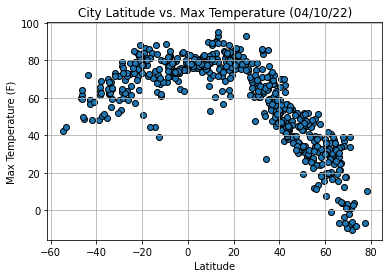

In [8]:
# Convert Date column to datetime for date display
clean_city_data['Date'] = clean_city_data['Date'].astype("datetime64[s]")
# Obtain the oldest date in our dataset to reflect dataset's age and apply formatting
display_date = clean_city_data['Date'].min().strftime('%m/%d/%y')

# Plot Latitude vs. Temperature with title, labels, and grid
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="C0", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/Lat_v_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

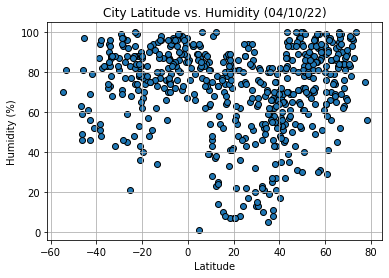

In [9]:
# Plot Latitude vs. Humidity with title, labels, and grid
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", facecolors="C0", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/Lat_v_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

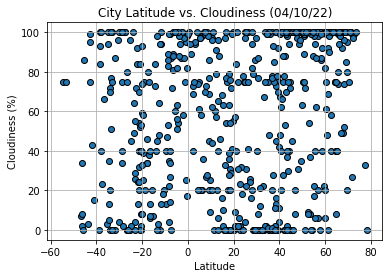

In [10]:
# Plot Latitude vs. Cloudiness with title, labels, and grid
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", facecolors="C0", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/Lat_v_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

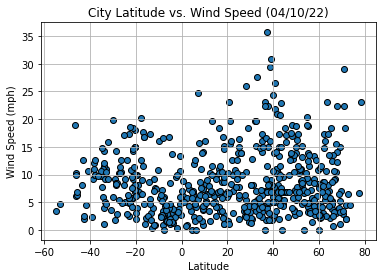

In [11]:
# Plot Latitude vs. Wind Speed with title, labels, and grid
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="C0", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/Lat_v_Wind_Speed.png")
plt.show()

## Linear Regression

In [12]:
# Create separate DataFrames for northern and southern hemispheres
clean_city_data_north = pd.DataFrame(clean_city_data.loc[clean_city_data['Lat']>=0])
clean_city_data_south = pd.DataFrame(clean_city_data.loc[clean_city_data['Lat']<0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8076557860417742


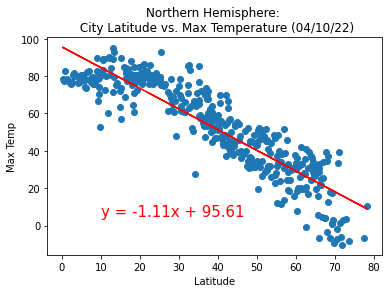

In [13]:
# Calculate linear regression for Northern Hemisphere Latitude vs. Max Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_north['Lat'], clean_city_data_north['Max Temp'])
regress_values = clean_city_data_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Northern Hemisphere Latitude vs. Max Temperature with linear regression, labels
plt.scatter(clean_city_data_north['Lat'], clean_city_data_north['Max Temp'], marker="o")

plt.plot(clean_city_data_north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")

plt.title(f"Northern Hemisphere: \n City Latitude vs. Max Temperature ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Temp_North.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3191856926844165


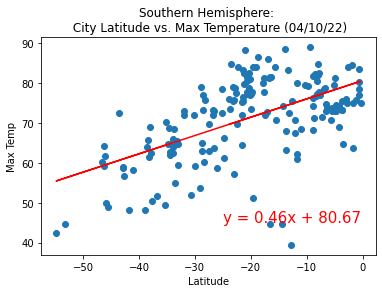

In [14]:
# Calculate linear regression for Southern Hemisphere Latitude vs. Max Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_south['Lat'], clean_city_data_south['Max Temp'])
regress_values = clean_city_data_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Southern Hemisphere Latitude vs. Max Temperature with linear regression, labels
plt.scatter(clean_city_data_south['Lat'], clean_city_data_south['Max Temp'], marker="o")

plt.plot(clean_city_data_south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")

plt.title(f"Southern Hemisphere: \n City Latitude vs. Max Temperature ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Temp_South.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05873001748056258


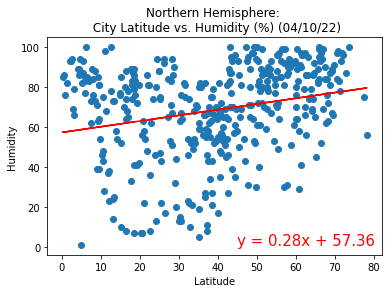

In [15]:
# Calculate linear regression for Northern Hemisphere Latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_north['Lat'], clean_city_data_north['Humidity'])
regress_values = clean_city_data_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Northern Hemisphere Latitude vs. Humidity with linear regression, labels
plt.scatter(clean_city_data_north['Lat'], clean_city_data_north['Humidity'], marker="o")

plt.plot(clean_city_data_north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45,0.8),fontsize=15,color="red")

plt.title(f"Northern Hemisphere: \n City Latitude vs. Humidity (%) ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Humidity_North.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07178782841834278


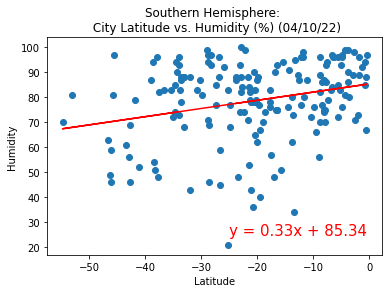

In [16]:
# Calculate linear regression for Southern Hemisphere Latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_south['Lat'], clean_city_data_south['Humidity'])
regress_values = clean_city_data_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Southern Hemisphere Latitude vs. Humidity with linear regression, labels
plt.scatter(clean_city_data_south['Lat'], clean_city_data_south['Humidity'], marker="o")

plt.plot(clean_city_data_south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

plt.title(f"Southern Hemisphere: \n City Latitude vs. Humidity (%) ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Humidity_South.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06419698970019373


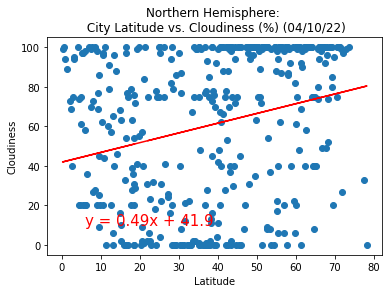

In [17]:
# Calculate linear regression for Northern Hemisphere Latitude vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_north['Lat'], clean_city_data_north['Cloudiness'])
regress_values = clean_city_data_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Northern Hemisphere Latitude vs. Cloudiness with linear regression, labels
plt.scatter(clean_city_data_north['Lat'], clean_city_data_north['Cloudiness'], marker="o")

plt.plot(clean_city_data_north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,10),fontsize=15,color="red")

plt.title(f"Northern Hemisphere: \n City Latitude vs. Cloudiness (%) ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Cloudiness_North.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02443019077432188


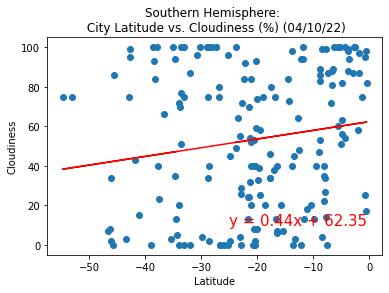

In [18]:
# Calculate linear regression for Southern Hemisphere Latitude vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_south['Lat'], clean_city_data_south['Cloudiness'])
regress_values = clean_city_data_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Southern Hemisphere Latitude vs. Cloudiness with linear regression, labels
plt.scatter(clean_city_data_south['Lat'], clean_city_data_south['Cloudiness'], marker="o")

plt.plot(clean_city_data_south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.title(f"Southern Hemisphere: \n City Latitude vs. Cloudiness (%) ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Cloudiness_South.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006734746039947776


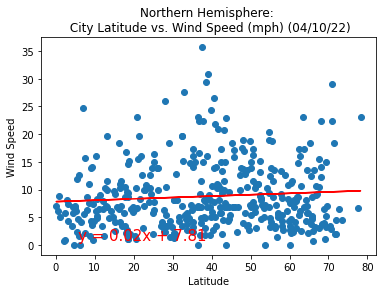

In [19]:
# Calculate linear regression for Northern Hemisphere Latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_north['Lat'], clean_city_data_north['Wind Speed'])
regress_values = clean_city_data_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Northern Hemisphere Latitude vs. Wind Speed with linear regression, labels
plt.scatter(clean_city_data_north['Lat'], clean_city_data_north['Wind Speed'], marker="o")

plt.plot(clean_city_data_north['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title(f"Northern Hemisphere: \n City Latitude vs. Wind Speed (mph) ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Wind_Speed_North.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0706628439290012


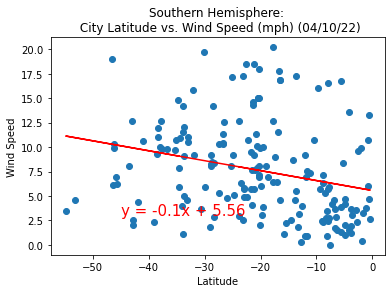

In [20]:
# Calculate linear regression for Southern Hemisphere Latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_south['Lat'], clean_city_data_south['Wind Speed'])
regress_values = clean_city_data_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Southern Hemisphere Latitude vs. Wind Speed with linear regression, labels
plt.scatter(clean_city_data_south['Lat'], clean_city_data_south['Wind Speed'], marker="o")

plt.plot(clean_city_data_south['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-45,3),fontsize=15,color="red")

plt.title(f"Southern Hemisphere: \n City Latitude vs. Wind Speed (mph) ({display_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue**2}")
plt.savefig("Images/Lat_v_Wind_Speed_South.png")
plt.show()